**Feature Engineering**

SKlearn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read titanic dataset
df_og = pd.read_csv(r"C:\Users\amkb2\Downloads\titanic\train.csv")

**One hot encoding**

In [3]:
from sklearn.preprocessing import OneHotEncoder

In [4]:
df_emb = df_og['Embarked']
df_emb.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [5]:
df_emb = df_emb.values.reshape(-1,1)
# create an encoder & fit the dataframe
enc = OneHotEncoder(sparse=False).fit(df_emb)
encoded = enc.transform(df_emb)

# convert it to a dataframe
ohe_df = pd.DataFrame(
    encoded,
    columns=enc.get_feature_names_out()
)
print(ohe_df.head())
print(ohe_df.shape)

   x0_C  x0_Q  x0_S  x0_nan
0   0.0   0.0   1.0     0.0
1   1.0   0.0   0.0     0.0
2   0.0   0.0   1.0     0.0
3   0.0   0.0   1.0     0.0
4   0.0   0.0   1.0     0.0
(891, 4)


C:\Users\amkb2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


**Text Embedding**

OpenAI embedding service

**Feature Scaling**

<Axes: >

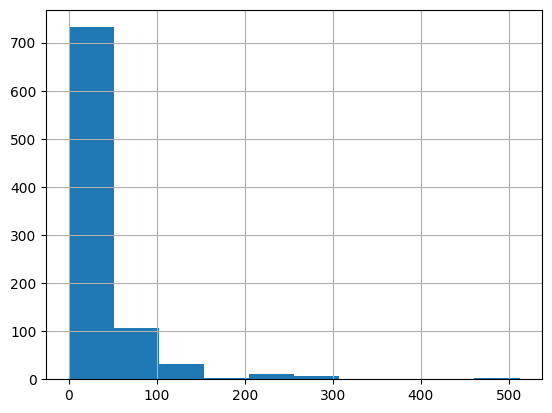

In [6]:
df_og.Fare.hist()

In [7]:
df_og['logfare'] = np.log10(df_og['Fare'],where=df_og['Fare']>0)

<Axes: >

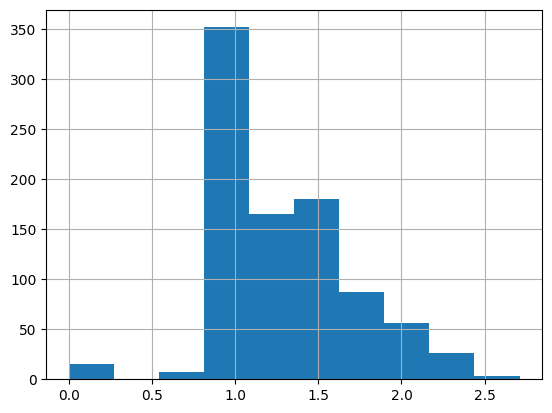

In [8]:
df_og.logfare.hist()

**Principal Component Analysis** 

In [9]:
mnist = pd.read_csv(r"C:\Users\amkb2\Downloads\archive\mnist_train.csv")
mnist.head(10)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
mnist.shape

(60000, 785)

In [11]:
import matplotlib.pyplot as plt
mnist.drop(columns='label',inplace=True)

Text(0.5, 1.0, 'Tenth image: Digit 4')

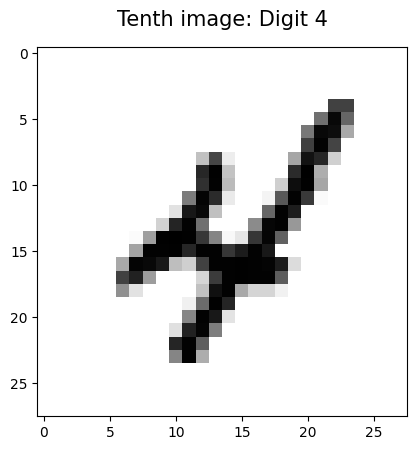

In [12]:
second_image = mnist.iloc[9].values.reshape([28,28])
plt.imshow(second_image,cmap='gray_r')
plt.title('Tenth image: Digit 4',fontsize=15,pad=15)

next step would be is to scale the features so they are on the same or similar ranges.PCA is very sensitive so scale as method is based on explained variance.Larger scaled values would produce much greater variance.However,in an image all values are already scaled at each pixel(0 to 255 in this case)

In [13]:
print(mnist.iloc[1].min())
print(mnist.iloc[1].max())

0
255


In [ ]:
from sklearn.decomposition import PCA

pca_784 = PCA(n_components=784)
pca_784.fit(mnist)

plt.grid()
plt.plot(np.cumsum(pca_784.explained_variance_ratio_* 100))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

In [ ]:
# lets just use the first 25 components
pca_25 = PCA(n_components=25)
mnist_pca_25_reduced = pca_25.fit_transform(mnist)
mnist_pca_25_reduced = pca_25.inverse_transform(mnist_pca_25_reduced)
image_pca_25 = mnist_pca_25_recovered[1,:].reshape[28,28]
plt.imshow(image_pca_25,cmap='gray_r')
plt.title('Compressed image with 25 components',fontsize=15,pad=15)